In [146]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [147]:
review_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Movie Review Prediction Using NLP/IMDB Dataset.csv")

In [148]:
review_df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [149]:
review_df = review_df.rename(columns={'sentiment':'rating'})
review_df.head()

,review,rating
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [150]:
review_df.describe()

,review,rating
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [151]:
#Balanced Dataset
review_df['rating'].value_counts()

positive    25000
negative    25000
Name: rating, dtype: int64

In [152]:
#Convert the categorical features into numeric values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [153]:
review_df['rating'] = le.fit_transform(review_df['rating'])

In [154]:
review_df.head()

,review,rating
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [155]:
review_df['review']

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [156]:
import nltk
import re
#from nltk.corpus import stopwords
#nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

#sw = set(stopwords.words("english"))
lt = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [157]:
corpus = []
for i in range(0,len(review_df)):
  sentence = review_df["review"][i].lower()
  sentence = sentence.replace('<br /><br />',"")
  sentence = re.sub('[^a-zA-Z]+'," ",sentence)

  sentence = sentence.split()
  sentence = [lt.lemmatize(word) for word in sentence]
  sentence = " ".join(sentence)

  corpus.append(sentence)
  

In [158]:
corpus[3]

'basically there s a family where a little boy jake think there s a zombie in his closet his parent are fighting all the time this movie is slower than a soap opera and suddenly jake decides to become rambo and kill the zombie ok first of all when you re going to make a film you must decide if it a thriller or a drama a a drama the movie is watchable parent are divorcing arguing like in real life and then we have jake with his closet which totally ruin all the film i expected to see a boogeyman similar movie and instead i watched a drama with some meaningless thriller spot out of just for the well playing parent descent dialog a for the shot with jake just ignore them'

In [159]:
#One_hot Representaion
from tensorflow.keras.preprocessing.text import one_hot
voc_size = 10000
onehot_repr = [one_hot(word,voc_size) for word in corpus]
onehot_repr[0]

[8274,
 7002,
 1724,
 6886,
 8329,
 5429,
 1968,
 8117,
 3928,
 2136,
 5107,
 9305,
 5021,
 1957,
 9959,
 3710,
 6468,
 5697,
 4521,
 4018,
 5873,
 7344,
 8718,
 2411,
 5176,
 5218,
 4933,
 6774,
 1724,
 8260,
 7352,
 8117,
 3624,
 6774,
 3729,
 9305,
 9673,
 540,
 863,
 4280,
 1186,
 4420,
 7002,
 3244,
 7533,
 6777,
 8560,
 4018,
 1708,
 1724,
 3823,
 4186,
 4284,
 6774,
 7344,
 8718,
 8706,
 5873,
 9704,
 2899,
 1724,
 1382,
 5788,
 3553,
 6799,
 7344,
 9704,
 2897,
 6780,
 5979,
 4933,
 1156,
 70,
 9165,
 3475,
 3553,
 3244,
 540,
 8718,
 4823,
 8560,
 1724,
 5030,
 3545,
 7002,
 1724,
 3823,
 540,
 8718,
 3128,
 9305,
 5873,
 8117,
 8718,
 1724,
 6357,
 9165,
 70,
 1724,
 2101,
 2014,
 2369,
 4832,
 1846,
 540,
 4535,
 3800,
 6587,
 1470,
 1045,
 3864,
 9202,
 4990,
 7002,
 1724,
 8975,
 4568,
 3084,
 1724,
 6933,
 5188,
 4480,
 454,
 4280,
 3890,
 293,
 4311,
 3870,
 8718,
 8706,
 1878,
 6587,
 1724,
 8505,
 2712,
 1045,
 8718,
 9067,
 70,
 5079,
 4078,
 5676,
 5877,
 2065,
 1982

In [160]:
#Applying Padding for sentences
from tensorflow.keras.preprocessing.sequence import pad_sequences
sent_length = 100
embedded_docs = pad_sequences(onehot_repr,maxlen = sent_length,padding='pre')
embedded_docs[1]

array([5172, 9064, 1724, 9058,   70, 9205, 3377, 1571, 8706, 8326, 8718,
        540, 9879, 8802, 1724, 2136, 3780,  540, 8718, 5873, 2685, 5593,
       4280, 1678, 8884, 5873, 6842, 8732, 3729, 8274, 7002, 1724, 8073,
       1275, 6339, 7002, 8413, 4280, 8119,   37, 1724, 2350, 9876, 5212,
       9067, 4933, 1724, 4350, 7352, 1724, 5372, 7002, 1724, 6634, 7533,
       8305, 2293, 3545, 1724, 6931, 2380, 3795, 3644, 9878, 2405, 8163,
        540, 8328, 6587, 1678, 6138, 4280, 1678, 7372, 9514, 4933, 1724,
       4420, 1578, 6524, 4280, 4073, 4280, 1724, 6777, 9514, 7002, 7064,
       3643, 4933, 4073, 6339,   23,  754, 4688,  233, 4521, 4845, 9879,
       8268], dtype=int32)

In [161]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout

In [162]:
#Creating Model
embedded_vector_features = 100
model = Sequential()
model.add(Embedding(voc_size,embedded_vector_features,input_length=sent_length))
model.add(Bidirectional(LSTM(128)))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [163]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 256)               234496    
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_13 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_14 (Dropout)         (None, 32)               

In [164]:
X = embedded_docs
X,X.shape

(array([[9673, 2353, 8022, ..., 7758, 5912, 4001],
        [5172, 9064, 1724, ..., 4845, 9879, 8268],
        [9673, 8279, 8117, ..., 9765, 4933, 6151],
        ...,
        [1724, 8260, 9407, ..., 4314, 4280, 9876],
        [8948, 5697, 6777, ..., 2788, 3767, 3729],
        [5021, 7545, 7344, ..., 9013, 7344, 3584]], dtype=int32), (50000, 100))

In [165]:
y = review_df['rating'].values
y,y.shape

(array([1, 1, 1, ..., 0, 0, 0]), (50000,))

In [177]:
#Split the Data
#X_train = X[:40000]
#X_test = X[40000:]
#y_train = y[:40000]
#y_test = y[40000:]
#X_train.shape,X_test.shape,y_train.shape,y_test.shape

#OR

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [188]:
#Train the Model
history = model.fit(X_train,y_train,batch_size=128,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
313/313 [==============================] - 25s 80ms/step - loss: 0.0104 - accuracy: 0.9963 - val_loss: 0.7682 - val_accuracy: 0.8851
Epoch 2/10
313/313 [==============================] - 22s 69ms/step - loss: 0.0073 - accuracy: 0.9977 - val_loss: 0.8382 - val_accuracy: 0.8834
Epoch 3/10
313/313 [==============================] - 21s 68ms/step - loss: 0.0108 - accuracy: 0.9965 - val_loss: 0.8042 - val_accuracy: 0.8745
Epoch 4/10
313/313 [==============================] - 21s 66ms/step - loss: 0.0074 - accuracy: 0.9978 - val_loss: 0.8611 - val_accuracy: 0.8821
Epoch 5/10
313/313 [==============================] - 20s 64ms/step - loss: 0.0066 - accuracy: 0.9979 - val_loss: 0.8974 - val_accuracy: 0.8793
Epoch 6/10
313/313 [==============================] - 20s 64ms/step - loss: 0.0070 - accuracy: 0.9980 - val_loss: 0.8441 - val_accuracy: 0.8766
Epoch 7/10
313/313 [==============================] - 20s 64ms/step - loss: 0.0090 - accuracy: 0.9967 - val_loss: 0.8518 - val_accuracy:

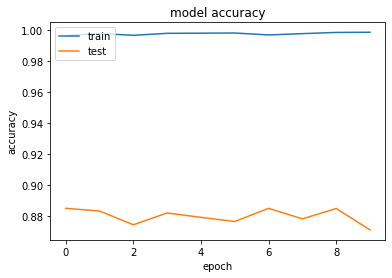

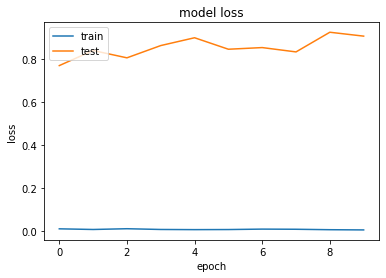

In [189]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [190]:
y_pred = model.predict_classes(X_test)
y_pred

array([[0],
       [1],
       [0],
       ...,
       [1],
       [0],
       [1]], dtype=int32)

In [191]:
y_test

array([1, 1, 0, ..., 1, 0, 1])

In [192]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[4427,  534],
       [ 754, 4285]])

In [193]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8712

In [223]:

review = ["total waste of time even during Covid."]

corp = []
sent = review[0].lower()
sent = sent.replace('<br /><br />',"")
sent = re.sub('[^a-zA-Z]+'," ",sent)

sent = sent.split()
sent = [lt.lemmatize(word) for word in sent]
sent = " ".join(sent)
corp.append(sent)

onehot = [one_hot(corp[0],voc_size)]
padding = pad_sequences(onehot,maxlen = 100,padding='pre')

corp[0],padding


('total waste of time even during covid',
 array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0, 9996, 1703, 7002, 3744, 5084, 4020,
         2830]], dtype=int32))

In [224]:
prediction = model.predict(padding)
prediction

array([[2.172216e-14]], dtype=float32)

In [225]:
prediction = ["positive" if i>=0.5 else "negative" for i in prediction]
prediction

['negative']